In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('building_output_denali.csv')

# Filter out rows where 'footprint' is NaN or 0
df_filtered = df.dropna(subset=['area'])
df_filtered = df_filtered[df_filtered['area'] > 0]

# Sort the data by 'footprint' from smallest to largest
df_sorted = df_filtered.sort_values(by='area')

total_buildings = len(df_sorted)

print(f'Total number of buildings: {total_buildings}')

Total number of buildings: 2404


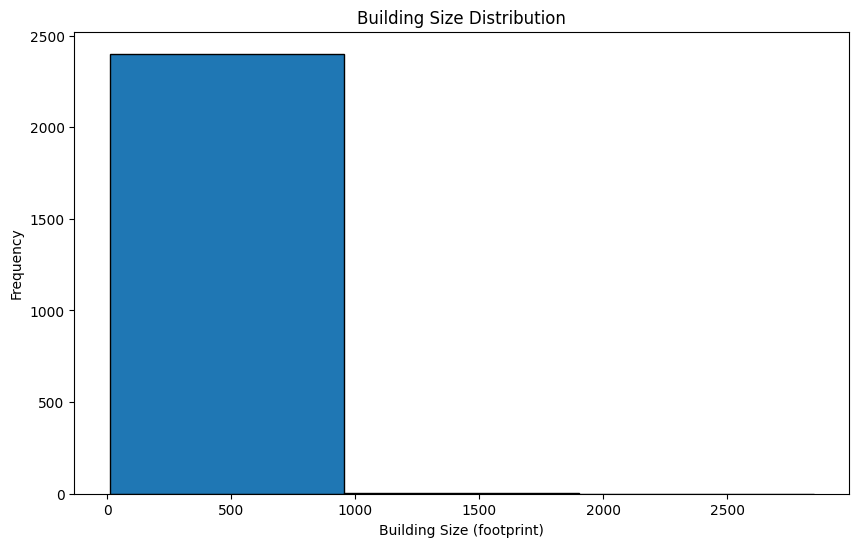

In [3]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_sorted['area'], bins=3, edgecolor='black')
plt.title('Building Size Distribution')
plt.xlabel('Building Size (footprint)')
plt.ylabel('Frequency')
plt.show()

In [5]:
import numpy as np

# Calculate histogram and bin edges
counts, bin_edges = np.histogram(df_sorted['area'], bins=3)

# Initialize list to store averages
bin_averages = []

# Calculate average for each bin
for i in range(len(bin_edges)-1):
    # Filter data for this bin
    bin_filter = (df_sorted['area'] >= bin_edges[i]) & (df_sorted['area'] < bin_edges[i+1])
    bin_data = df_sorted[bin_filter]
    
    # Check if there's only one building in the bin
    if counts[i] == 1 and not bin_data.empty:
        # Directly use the building's size if only one is present
        size = bin_data['area'].iloc[0]
        bin_averages.append(size)
        print(f'Bin {i+1}:')
        print(f'  Number of buildings: {counts[i]}')
        print(f'  Building size: {size}')
    elif not bin_data.empty:
        # Calculate and store average size if more than one building is present
        avg = bin_data['area'].mean()
        bin_averages.append(avg)
        print(f'Bin {i+1}:')
        print(f'  Number of buildings: {counts[i]}')
        print(f'  Average building size: {avg}')
    else:
        # Handle case where bin is empty
        print(f'Bin {i+1}:')
        print(f'  Number of buildings: {counts[i]}')
        print('  No data available for this bin.')



Bin 1:
  Number of buildings: 2401
  Average building size: 139.33349386755827
Bin 2:
  Number of buildings: 2
  Average building size: 1428.03740852338
Bin 3:
  Number of buildings: 1
  No data available for this bin.


In [6]:
import numpy as np

# Calculate histogram and bin edge using only 1 bin
counts, bin_edges = np.histogram(df_sorted['area'], bins=1)

# Initialize list to store averages
bin_averages = []

# Since there is only one bin, calculate average for that bin
# Filter data for this bin
bin_filter = (df_sorted['area'] >= bin_edges[0]) & (df_sorted['area'] < bin_edges[1])
bin_data = df_sorted[bin_filter]

# Calculate and store average
avg = bin_data['area'].mean()
bin_averages.append(avg)

# Print number of buildings and average size for the single bin
print(f'Bin 1:')
print(f'  Number of buildings: {counts[0]}')
print(f'  Average building size: {avg}')

Bin 1:
  Number of buildings: 2404
  Average building size: 140.40607307243204
